## 0. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier


from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

## 0.1 Read data

In [2]:
listOfNames = ['Youtube01-Psy.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']

In [3]:
data = [pd.read_csv(file) for file in listOfNames]

for index, file in enumerate(listOfNames):
    print('='*40)
    print(file)
    print(data[index].head(3))

Youtube01-Psy.csv
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   

   CLASS  
0      1  
1      1  
2      1  
Youtube02-KatyPerry.csv
                              COMMENT_ID       AUTHOR                 DATE  \
0      z12pgdhovmrktzm3i23es5d5junftft3f  lekanaVEVO1  2014-07-22T15:27:50   
1    z13yx345uxepetggz04ci5rjcxeohzlrtf4     Pyunghee  2014-07-27T01:57:16   
2  z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k   Erica Ross  2014-07-27T02:51:43   

                   

In [4]:
for i in data:
    i.drop('COMMENT_ID', axis=1, inplace=True)
    i.drop_duplicates(inplace=True)
    print('='*40)
    i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   350 non-null    object
 1   DATE     350 non-null    object
 2   CONTENT  350 non-null    object
 3   CLASS    350 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   350 non-null    object
 1   DATE     350 non-null    object
 2   CONTENT  350 non-null    object
 3   CLASS    350 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   438 non-null    object
 1   DATE     438 non-null    o

Youtube01-Psy.csv


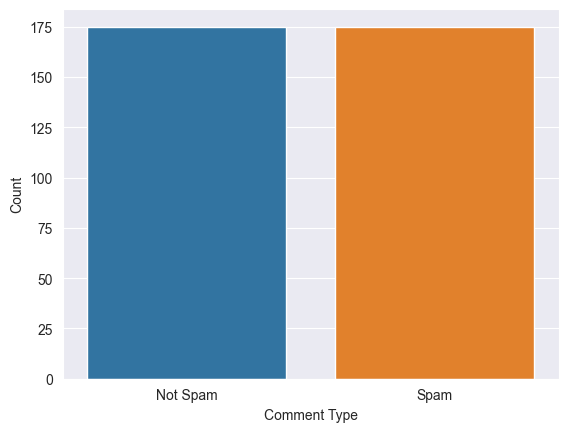

Youtube02-KatyPerry.csv


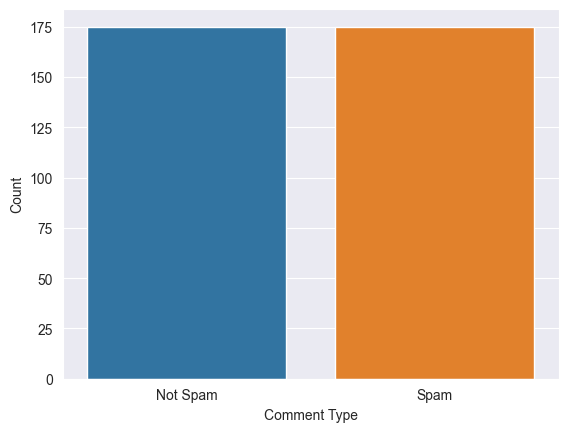

Youtube03-LMFAO.csv


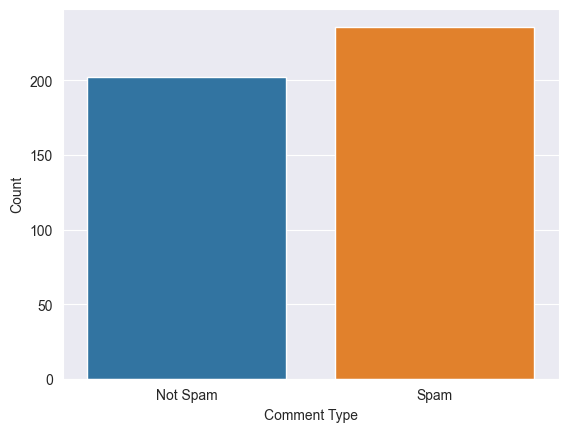

Youtube04-Eminem.csv


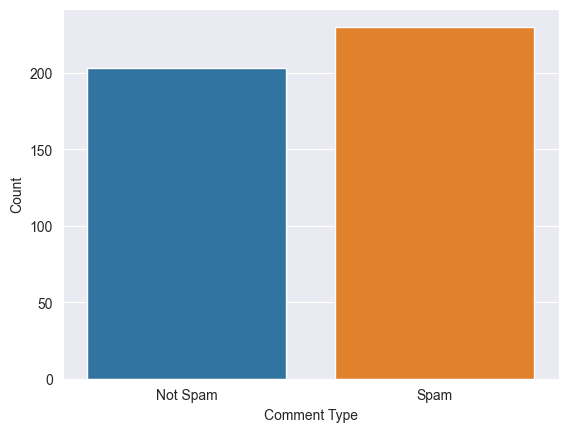

Youtube05-Shakira.csv


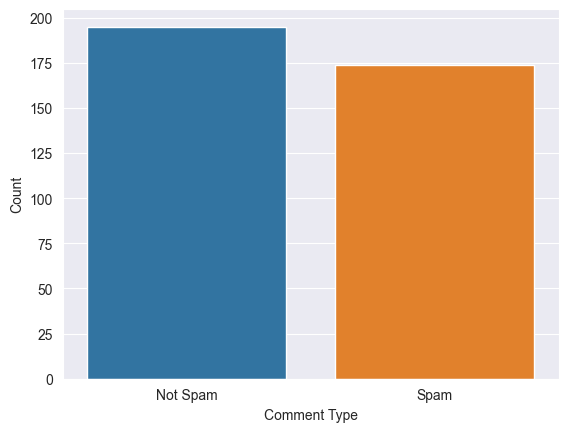

In [5]:
for index, df in enumerate(data):
    print(listOfNames[index])
    sns.countplot(x="CLASS", data=df)
    plt.xlabel('Comment Type')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Not Spam', 'Spam'])
    plt.show()

In [6]:
for index, df in enumerate(data):
    print('='*40)
    print(listOfNames[index])
    print(df.isnull().sum())

Youtube01-Psy.csv
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
Youtube02-KatyPerry.csv
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
Youtube03-LMFAO.csv
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
Youtube04-Eminem.csv
AUTHOR       0
DATE       230
CONTENT      0
CLASS        0
dtype: int64
Youtube05-Shakira.csv
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64


## 1.Data preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   1940 non-null   object
 1   DATE     1710 non-null   object
 2   CONTENT  1940 non-null   object
 3   CLASS    1940 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 60.8+ KB


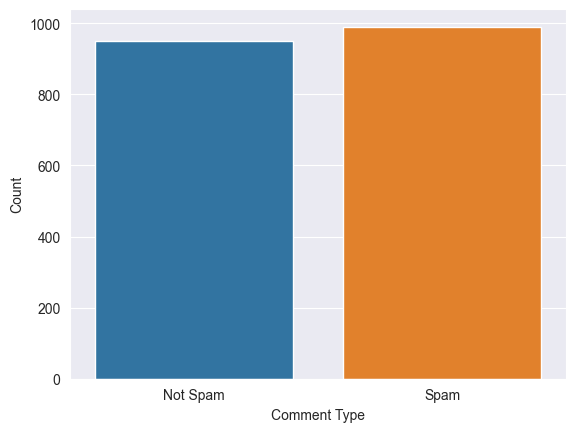

In [7]:
df = pd.concat(data, ignore_index=True)
df.info()

sns.countplot(x="CLASS", data = df)
plt.xlabel('Comment Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

In [8]:
df = df.fillna(0)
df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,1940,1940.0,1940,1940.000000
unique,1792,1710.0,1760,NaN
top,Louis Bryant,0.0,Check out this video on YouTube:﻿,NaN
freq,7,230.0,96,NaN
mean,NaN,NaN,NaN,0.510309
std,NaN,NaN,NaN,0.500023
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


## 2. Model

In [9]:
X = df.CONTENT
Y = df.CLASS
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1552,)
(388,)
(1552,)
(388,)


In [10]:
count_vec = CountVectorizer(stop_words="english",lowercase=True, analyzer='word')
count_vec.fit(X_train)

CountVectorizer(stop_words='english')

In [11]:
count_vec.get_feature_names_out() #return unique tokens

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

In [12]:
X_train_dtm = count_vec.transform(X_train)
X_train_dtm.toarray() # row is a sample of text
                      # column is a word
                      # value is a count of repetitions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
X_test_dtm = count_vec.transform(X_test)
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 3.1 k-nearest neighbors

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_dtm, Y_train)
predict = knn_model.predict(X_test_dtm)
print(confusion_matrix(Y_test, predict))
print(classification_report(Y_test, predict))


[[179   4]
 [ 65 140]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       183
           1       0.97      0.68      0.80       205

    accuracy                           0.82       388
   macro avg       0.85      0.83      0.82       388
weighted avg       0.86      0.82      0.82       388



## 3.2 LSTM

In [15]:
# Converting text data to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # build a dictionary of all unique words (tokens)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [16]:
# Padding sequences with zeros for the same length
max_sequence_length = max(max(len(seq) for seq in X_train_seq),
                          max(len(seq) for seq in X_test_seq))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [17]:
# Creating an LSTM model
lstm_model = Sequential()

# Adding an Embedding layer to convert words into vectors of a specified dimension
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))

# Adding an LSTM layer with 64 hidden units
lstm_model.add(LSTM(units=64))

# Adding a dense layer with one output neuron and sigmoid activation
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model on the training data with the specified number of epochs and batch size of 32
lstm_model.fit(X_train_padded, Y_train, epochs=10, batch_size=32)


Epoch 1/10
49/49 [==============================] - 8s 98ms/step - loss: 0.5704 - accuracy: 0.6881
Epoch 2/10
49/49 [==============================] - 5s 96ms/step - loss: 0.1631 - accuracy: 0.9433
Epoch 3/10
49/49 [==============================] - 5s 98ms/step - loss: 0.0699 - accuracy: 0.9762
Epoch 4/10
49/49 [==============================] - 5s 103ms/step - loss: 0.0360 - accuracy: 0.9903
Epoch 5/10
49/49 [==============================] - 5s 94ms/step - loss: 0.0227 - accuracy: 0.9968
Epoch 6/10
49/49 [==============================] - 5s 99ms/step - loss: 0.0113 - accuracy: 0.9981
Epoch 7/10
49/49 [==============================] - 4s 86ms/step - loss: 0.0066 - accuracy: 0.9987
Epoch 8/10
49/49 [==============================] - 5s 93ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 9/10
49/49 [==============================] - 4s 81ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
49/49 [==============================] - 4s 82ms/step - loss: 0.0014 - accuracy: 0.9994


In [18]:
predictions = lstm_model.predict(X_test_padded)

# Convert predictions to binary format (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)

print(confusion_matrix(Y_test, predictions_binary))
print(classification_report(Y_test, predictions_binary))

13/13 [==============================] - 1s 25ms/step
[[177   6]
 [ 12 193]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       183
           1       0.97      0.94      0.96       205

    accuracy                           0.95       388
   macro avg       0.95      0.95      0.95       388
weighted avg       0.95      0.95      0.95       388

